In [13]:
#Package modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import time
import math

#Custom modules
from digitclassifier import DigitClassifier, show_image

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using MNIST 784 which is small subset of MNIST dataset, containing 70,000 images with flattened image vector of 784x1 each having dimension as 128x128

In [15]:
_x, _y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [16]:
print(_y.view())

['5' '0' '4' ... '4' '5' '6']


In [17]:
x = _x[:1000,:] #Using a slice for initial setup
y = _y[:1000]   #Using a slice for initial setup

x = (x/255).astype('float32')
y = pd.Series(y, dtype="category").cat.codes.values

img_w = 28;
img_l = 28;

print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(y.shape))
print("sample y = {}".format(y))
print("sample y as categorical var = {}".format(y))
print("image width = {}".format(img_w))
print("image length = {}".format(img_l))

assert img_l*img_w == x.shape[1]
input_row_size = x.shape[1]
print("Flattened image dimension same as input row = {}".format(input_row_size))

x.shape = (1000, 784)
y.shape = (1000,)
sample y = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 

Visualizing image from MNIST dataset

<Figure size 432x288 with 0 Axes>

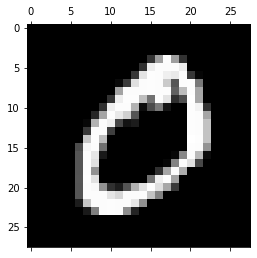

In [18]:
show_image(x[1], img_w, img_l)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Let's visualize train test data

<Figure size 432x288 with 0 Axes>

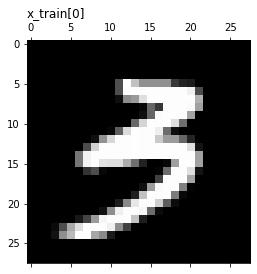

y_train[0] = 3
y_test[0] = 7


<Figure size 432x288 with 0 Axes>

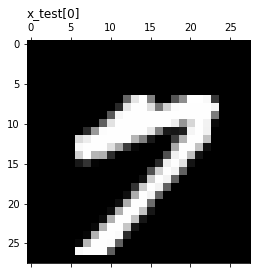

In [20]:
show_image(x_train[0], img_w, img_l, "x_train[0]")
print(f"y_train[0] = {y_train[0]}")
show_image(x_test[0], img_w, img_l, "x_test[0]")
print(f"y_test[0] = {y_test[0]}")

In [21]:
layer1_size = 128
layer2_size = 64
activation_layer_size = 10;

print("input_row_size = {}".format(input_row_size))
print("layer1_size = {}".format(layer1_size))
print("layer2_size = {}".format(layer2_size))
print("activation_layer_size = {}".format(activation_layer_size))

input_row_size = 784
layer1_size = 128
layer2_size = 64
activation_layer_size = 10


In [ ]:
# %load digitclassifier.py

In [24]:
model = DigitClassifier(
    img_w=img_w,
    img_l=img_l,
    sizes=[input_row_size, layer1_size, layer2_size, activation_layer_size],
    epochs=10)
model.train(x_train, y_train, x_test, y_test)

changes_to_w={'W3': -2.602965783259345, 'W2': 1.5473987831849594, 'W1': 1.5522853244863417}
changes_to_w={'W3': -6.621947333830965, 'W2': 1.9331555591903284, 'W1': 3.554535193099604}
changes_to_w={'W3': -5.689721689259453, 'W2': -1.4536972792873804, 'W1': 2.5148372819355926}
changes_to_w={'W3': 0.2888175110816414, 'W2': 0.4697463290546078, 'W1': -0.06785949050901667}
changes_to_w={'W3': -0.6838154836239394, 'W2': -0.3315189366273235, 'W1': 0.32189044396143746}
changes_to_w={'W3': 0.29814637832515173, 'W2': 0.5169041088225673, 'W1': -0.04536327571508769}
changes_to_w={'W3': -0.6958490333538173, 'W2': -0.35949840388051924, 'W1': 0.32606732333692795}
changes_to_w={'W3': -3.691589998401325, 'W2': -3.358296577203361, 'W1': 1.1709213361016322}
changes_to_w={'W3': -3.711325890216153, 'W2': -4.704327266237383, 'W1': 1.1734660504494312}
changes_to_w={'W3': -6.658557307866083, 'W2': -12.273530280850785, 'W1': 0.487523720114007}
changes_to_w={'W3': -8.586210042902822, 'W2': -24.771034806243172, '

changes_to_w={'W3': -1.5521496665436796, 'W2': -0.01811272663385153, 'W1': -0.012971424503029481}
changes_to_w={'W3': -6.552152080074958, 'W2': -0.043245540147667544, 'W1': -0.017148507628660735}
changes_to_w={'W3': -5.552153949297604, 'W2': -0.02491653406835423, 'W1': -0.0015385370727971216}
changes_to_w={'W3': 0.44784591581686023, 'W2': 0.0004463184363540508, 'W1': 1.3917423235368304e-05}
changes_to_w={'W3': -6.55215343987741, 'W2': -0.033163902691697056, 'W1': -0.005987594255040434}
changes_to_w={'W3': -7.552153428643287, 'W2': -0.03798111899981644, 'W1': -0.006942923742926976}
changes_to_w={'W3': 0.4478463049506687, 'W2': 0.0004975693098454884, 'W1': 6.71350188675059e-05}
changes_to_w={'W3': -7.552153721681966, 'W2': -0.03621167644927722, 'W1': -0.005106915633118184}
changes_to_w={'W3': 0.4478468171096713, 'W2': 0.0005588368627328501, 'W1': 0.00013404356467734848}
changes_to_w={'W3': -8.55215285472215, 'W2': -0.04935699431370185, 'W1': -0.015038322673840103}
changes_to_w={'W3': -2.

changes_to_w={'W3': -7.552156572500188, 'W2': -0.023981698063327443, 'W1': -0.0036784390646786447}
changes_to_w={'W3': -7.552156780897079, 'W2': -0.02095185486169759, 'W1': -0.0005864353994886849}
changes_to_w={'W3': -1.552156755930203, 'W2': -0.0051539516878904585, 'W1': -0.00026997628488546304}
changes_to_w={'W3': -3.552156048632844, 'W2': -0.01601965389116331, 'W1': -0.006696976085451898}
changes_to_w={'W3': -2.552156310206615, 'W2': -0.010344485340176568, 'W1': -0.0030701060990067307}
changes_to_w={'W3': -3.552156182952754, 'W2': -0.014749681526817472, 'W1': -0.005180359351984881}
changes_to_w={'W3': -0.552155129881191, 'W2': -0.005470839353228892, 'W1': -0.003925667638523521}
changes_to_w={'W3': -0.5521532793762124, 'W2': -0.009135028474212688, 'W1': -0.009461239666585776}
changes_to_w={'W3': -3.552155596843138, 'W2': -0.019425883124568322, 'W1': -0.010963043006069755}
changes_to_w={'W3': -8.552156633260935, 'W2': -0.026555984135854437, 'W1': -0.0038308614342665746}
changes_to_w={

changes_to_w={'W3': -4.552157424782786, 'W2': -0.012333592679931032, 'W1': -0.004060741354570144}
changes_to_w={'W3': -4.552157469694937, 'W2': -0.01169190031521092, 'W1': -0.003291441208835998}
changes_to_w={'W3': -4.552157676464714, 'W2': -0.008710288275218213, 'W1': -8.722882777801252e-05}
changes_to_w={'W3': -6.552157459669051, 'W2': -0.01691414570004058, 'W1': -0.005148988743913256}
changes_to_w={'W3': -4.552157508087248, 'W2': -0.011143166427177997, 'W1': -0.0027113120780278754}
changes_to_w={'W3': -7.552157644890756, 'W2': -0.014815213071259176, 'W1': -0.0009407354073754158}
changes_to_w={'W3': -3.5521575363712214, 'W2': -0.008671971143233238, 'W1': -0.001933607809562117}
changes_to_w={'W3': 0.44784236155698776, 'W2': 0.0001954608718510371, 'W1': 1.4236132123850567e-05}
changes_to_w={'W3': -3.552154097012244, 'W2': -0.05003765109453442, 'W1': -0.06738221307260073}
changes_to_w={'W3': -7.552157163878193, 'W2': -0.02596858602107943, 'W1': -0.01403202730428428}
changes_to_w={'W3': 

changes_to_w={'W3': -5.5521579525162705, 'W2': -0.008378613072554587, 'W1': -0.0002786108333288759}
changes_to_w={'W3': 0.4478420408961774, 'W2': 0.00014297307272384595, 'W1': 2.3084868923518434e-06}
changes_to_w={'W3': -1.5521579172142925, 'W2': -0.0029627290571240324, 'W1': -0.0003668901038814293}
changes_to_w={'W3': -1.5521579580476788, 'W2': -0.0026548028118660878, 'W1': -4.931227747756469e-05}
changes_to_w={'W3': -0.5521568511427896, 'W2': -0.005771903218400345, 'W1': -0.0067383957703369066}
changes_to_w={'W3': -4.552157872231738, 'W2': -0.008608703848701292, 'W1': -0.0020118571716337052}
changes_to_w={'W3': -0.5521577496305022, 'W2': -0.002027954916318862, 'W1': -0.0009094664240443622}
changes_to_w={'W3': -2.5521579118016153, 'W2': -0.0045689361434740824, 'W1': -0.0006175852191946155}
changes_to_w={'W3': -0.5521577738951909, 'W2': -0.001902736683230319, 'W1': -0.0007491162228063748}
changes_to_w={'W3': -6.5521575069331055, 'W2': -0.022302907695324295, 'W1': -0.015678965888440116}

changes_to_w={'W3': -1.5521580476713681, 'W2': -0.0027032358621535395, 'W1': -0.0006736851263642737}
changes_to_w={'W3': -6.552157989185783, 'W2': -0.011985162576534852, 'W1': -0.004984701304610523}
changes_to_w={'W3': -5.5521581024302185, 'W2': -0.0068104029660658975, 'W1': -0.0003812666305268099}
changes_to_w={'W3': -8.552158059394236, 'W2': -0.012175490780938669, 'W1': -0.0026282625332684807}
changes_to_w={'W3': -6.55215797325579, 'W2': -0.012415465670888918, 'W1': -0.005542707427240204}
changes_to_w={'W3': -6.552157753357747, 'W2': -0.020592271533981788, 'W1': -0.017267422296843568}
changes_to_w={'W3': -0.5521578080876904, 'W2': -0.0024721881063716677, 'W1': -0.001919701252729665}
changes_to_w={'W3': -5.55215810626024, 'W2': -0.006733452988817427, 'W1': -0.000327420527088799}
changes_to_w={'W3': 0.4478418848228268, 'W2': 0.00011134051428749577, 'W1': 6.487120491174974e-07}
changes_to_w={'W3': -3.552157917963624, 'W2': -0.008109470080616103, 'W1': -0.004634110916284946}
changes_to_w

changes_to_w={'W3': -0.5521578638489945, 'W2': -0.0024580599057747576, 'W1': -0.002077878275328391}
changes_to_w={'W3': -5.552158159912713, 'W2': -0.005904324028996547, 'W1': -9.33321527316417e-05}
changes_to_w={'W3': -0.5521577684843656, 'W2': -0.003126934467048428, 'W1': -0.0031859279953464835}
changes_to_w={'W3': -3.5521581569915326, 'W2': -0.003959676519049091, 'W1': -0.00012173688287882859}
changes_to_w={'W3': -4.552158128822026, 'W2': -0.005843949737138151, 'W1': -0.001074176825427224}
changes_to_w={'W3': -6.552157998753601, 'W2': -0.013223003478625938, 'W1': -0.007755073562286465}
changes_to_w={'W3': -2.5521580472314174, 'W2': -0.004910778489099796, 'W1': -0.0024055234185642524}
changes_to_w={'W3': -0.5521579967747882, 'W2': -0.0017709768886383327, 'W1': -0.001078433808805011}
changes_to_w={'W3': -1.5521581500601354, 'W2': -0.0020069017343947344, 'W1': -0.00014395635963958248}
changes_to_w={'W3': 0.447841840446696, 'W2': 0.00010222190353768683, 'W1': 2.3343685646010274e-06}
chan

changes_to_w={'W3': -2.552158213179017, 'W2': -0.0025043843764249946, 'W1': -6.217975084239049e-05}
changes_to_w={'W3': -0.5521574720058456, 'W2': -0.006041897418754232, 'W1': -0.008918337501335374}
changes_to_w={'W3': -6.552158009280309, 'W2': -0.0161579466195263, 'W1': -0.013775866166160434}
changes_to_w={'W3': -2.5521581533284974, 'W2': -0.0036720683314576175, 'W1': -0.0013825460092024059}
changes_to_w={'W3': -6.552158182287329, 'W2': -0.007413438622362648, 'W1': -0.0017326313148537309}
changes_to_w={'W3': 0.44784178565355853, 'W2': 8.710953892404863e-05, 'W1': 1.9208639283532052e-06}
changes_to_w={'W3': -3.5521581437089376, 'W2': -0.005256120004408057, 'W1': -0.002242375497637968}
changes_to_w={'W3': -0.5521580306748791, 'W2': -0.0019509108398285382, 'W1': -0.0015413024077612554}
changes_to_w={'W3': 0.4478417831395583, 'W2': 8.539739886552121e-05, 'W1': 2.5341515138203297e-07}
changes_to_w={'W3': -4.552158204941615, 'W2': -0.004542022988187359, 'W1': -0.0004417867907770215}
changes

changes_to_w={'W3': -6.552158242042777, 'W2': -0.005518272776370823, 'W1': -0.00041252387609667533}
changes_to_w={'W3': -5.5521582472669495, 'W2': -0.004473499797162466, 'W1': -0.00010171913282056251}
changes_to_w={'W3': 0.44784175146354094, 'W2': 7.58060484676538e-05, 'W1': 7.902404762090446e-07}
changes_to_w={'W3': -1.5521582397722602, 'W2': -0.0015504774625420782, 'W1': -0.0001467341678581836}
changes_to_w={'W3': -1.5521582483690555, 'W2': -0.0014238233959948262, 'W1': -1.682187292625406e-05}
changes_to_w={'W3': -0.5521579624360066, 'W2': -0.002908971267516372, 'W1': -0.003355566109381719}
changes_to_w={'W3': -4.552158229113315, 'W2': -0.004435993220176735, 'W1': -0.0008529215103519805}
changes_to_w={'W3': -0.5521581995260291, 'W2': -0.001024512386667804, 'W1': -0.0004056642144765509}
changes_to_w={'W3': -2.5521582384433295, 'W2': -0.0023896939424645747, 'W1': -0.00025060078035764484}
changes_to_w={'W3': -0.5521582066244914, 'W2': -0.0009601295950250348, 'W1': -0.0003253360796187579

changes_to_w={'W3': -8.552158198036736, 'W2': -0.011253542376406103, 'W1': -0.0063084326574316275}
changes_to_w={'W3': 0.44784173364020063, 'W2': 6.991504396265494e-05, 'W1': 1.6696545497209132e-06}
changes_to_w={'W3': -6.55215825824259, 'W2': -0.005252154349209628, 'W1': -0.0006131419547332783}
changes_to_w={'W3': -6.552158250972078, 'W2': -0.005733337123457075, 'W1': -0.0011308163503194369}
changes_to_w={'W3': -7.552158262506271, 'W2': -0.005757106904695787, 'W1': -0.00043653431047477727}
changes_to_w={'W3': -3.5521582293283984, 'W2': -0.003881755763037821, 'W1': -0.0013734298005472702}
changes_to_w={'W3': -4.552158264142805, 'W2': -0.003487742003995801, 'W1': -0.00018616823822241874}
changes_to_w={'W3': -8.552158245070622, 'W2': -0.00784742748812773, 'W1': -0.001987933478078306}
changes_to_w={'W3': -1.5521582679227153, 'W2': -0.001290949688908586, 'W1': -1.1150475876976747e-05}
changes_to_w={'W3': 0.4478417414972025, 'W2': 7.71526924388687e-05, 'W1': 9.29519329775779e-06}
changes_to

changes_to_w={'W3': -3.5521582469874655, 'W2': -0.0037811992752097125, 'W1': -0.0015951855855793088}
changes_to_w={'W3': -8.552158280201615, 'W2': -0.005849716701043018, 'W1': -0.0004229205899508537}
changes_to_w={'W3': 0.4478417154085187, 'W2': 6.206205385196243e-05, 'W1': 4.166289280850827e-07}
changes_to_w={'W3': -2.5521582777109315, 'W2': -0.00197742847994338, 'W1': -0.00021388952732721107}
changes_to_w={'W3': -6.552158279416938, 'W2': -0.004589856011753335, 'W1': -0.00038656902658173575}
changes_to_w={'W3': -0.552157962265084, 'W2': -0.003698962232385916, 'W1': -0.005198450071107247}
changes_to_w={'W3': 0.4478417150401738, 'W2': 6.174829646797724e-05, 'W1': 1.496696608186706e-07}
changes_to_w={'W3': -4.552158276146286, 'W2': -0.003399448730758832, 'W1': -0.00042645304513815643}
changes_to_w={'W3': -3.5521582833508494, 'W2': -0.002441605835248884, 'W1': -6.425970942013135e-05}
changes_to_w={'W3': -3.5521582521336166, 'W2': -0.0036216914837528145, 'W1': -0.001415658548674195}
change

changes_to_w={'W3': -3.5521582830675866, 'W2': -0.0027751820983951715, 'W1': -0.0006708714492876704}
changes_to_w={'W3': -3.552158296695698, 'W2': -0.0022214705037905476, 'W1': -7.094861040751095e-05}
changes_to_w={'W3': -3.5521582962778453, 'W2': -0.0022318816791013396, 'W1': -8.165616013701004e-05}
changes_to_w={'W3': -1.552158260457599, 'W2': -0.0018577884699911308, 'W1': -0.0009622070831266366}
changes_to_w={'W3': -6.552158285747303, 'W2': -0.004721936290422491, 'W1': -0.0009702159838315579}
changes_to_w={'W3': -5.552158297674263, 'W2': -0.0033024078883522262, 'W1': -5.017366731030649e-05}
changes_to_w={'W3': 0.44784170179637256, 'W2': 5.5939373349958975e-05, 'W1': 3.219065687487766e-07}
changes_to_w={'W3': -6.552158294868202, 'W2': -0.004068264719569278, 'W1': -0.0002695043963681069}
changes_to_w={'W3': -7.552158294743617, 'W2': -0.004663090045983907, 'W1': -0.00031525287180826276}
changes_to_w={'W3': 0.447841703708375, 'W2': 5.8044632393000076e-05, 'W1': 2.469913919338727e-06}
ch

changes_to_w={'W3': -3.552158298019482, 'W2': -0.0024318149755729987, 'W1': -0.0004813334392329301}
changes_to_w={'W3': -7.552158298576083, 'W2': -0.004827389133678727, 'W1': -0.0008664302821367644}
changes_to_w={'W3': -8.552158295257145, 'W2': -0.005764625683999894, 'W1': -0.0013365654411289203}
changes_to_w={'W3': -7.552158306586717, 'W2': -0.004115248513870843, 'W1': -0.000108425468391281}
changes_to_w={'W3': -0.5521582793057724, 'W2': -0.0007647006227284085, 'W1': -0.0003609935579113258}
changes_to_w={'W3': -7.5521583047740215, 'W2': -0.004278670321820591, 'W1': -0.0002768759313506576}
changes_to_w={'W3': 0.4478416936263733, 'W2': 5.2855398131859506e-05, 'W1': 1.7439913372895353e-06}
changes_to_w={'W3': -7.5521583064808215, 'W2': -0.004127254482654705, 'W1': -0.00012212315253642552}
changes_to_w={'W3': -0.55215827785802, 'W2': -0.0007712488124833434, 'W1': -0.0003693349638630873}
changes_to_w={'W3': -5.552158301126996, 'W2': -0.003458260424844181, 'W1': -0.0004881424844920443}
chan

changes_to_w={'W3': -4.55215830218328, 'W2': -0.0030285860068343957, 'W1': -0.0007378800995943328}
changes_to_w={'W3': -3.552158302434343, 'W2': -0.0023910542783844814, 'W1': -0.0005659274270418207}
changes_to_w={'W3': -1.552158303849971, 'W2': -0.0011409568487008904, 'W1': -0.0002483978956830283}
changes_to_w={'W3': -7.552158307307028, 'W2': -0.004393392470719832, 'W1': -0.0006452239556610544}
changes_to_w={'W3': -6.552158307688719, 'W2': -0.0037732912284724964, 'W1': -0.0004854792268491491}
changes_to_w={'W3': -8.55215830527114, 'W2': -0.005127624314911204, 'W1': -0.0009270210950446696}
changes_to_w={'W3': -5.552158309328598, 'W2': -0.0031193534750671753, 'W1': -0.00030942097845270035}
changes_to_w={'W3': -3.5521583003456727, 'W2': -0.0024821667451386184, 'W1': -0.0006743101245489395}
changes_to_w={'W3': -7.552158286369811, 'W2': -0.006507645726478989, 'W1': -0.003238914213978416}
changes_to_w={'W3': -6.5521583094488225, 'W2': -0.003623290954238619, 'W1': -0.00033331418966897836}
cha

changes_to_w={'W3': -2.552158318701306, 'W2': -0.0013152014205824324, 'W1': -2.7471557784650674e-05}
changes_to_w={'W3': 0.44784168087098575, 'W2': 4.508017413603704e-05, 'W1': 3.519090757695956e-07}
changes_to_w={'W3': -3.5521583051156864, 'W2': -0.0025105708679202905, 'W1': -0.0008746137684134416}
changes_to_w={'W3': -0.5521582075174493, 'W2': -0.0019095322707984184, 'W1': -0.0023317159578565318}
changes_to_w={'W3': -2.5521583181988134, 'W2': -0.001332789212002184, 'W1': -4.595377620114654e-05}
changes_to_w={'W3': -2.55215831764211, 'W2': -0.001353757228986175, 'W1': -6.761605232863945e-05}
changes_to_w={'W3': -8.552158315427432, 'W2': -0.004418870758332874, 'W1': -0.0004831305478964152}
changes_to_w={'W3': -1.55215831898227, 'W2': -0.0008545490847487917, 'W1': -1.1621940165857258e-05}
changes_to_w={'W3': -2.5521583173273545, 'W2': -0.0013702283156891287, 'W1': -8.477242660520116e-05}
changes_to_w={'W3': -3.5521583039477935, 'W2': -0.0025137993469291475, 'W1': -0.0008744306288056179}

changes_to_w={'W3': -2.5521583234837317, 'W2': -0.0012530131746706565, 'W1': -6.614829358602291e-05}
changes_to_w={'W3': -5.552158323342797, 'W2': -0.0025590563486035276, 'W1': -0.0001444930200946572}
changes_to_w={'W3': -2.5521583212257783, 'W2': -0.0013412379863672979, 'W1': -0.00015802544062304107}
changes_to_w={'W3': -5.5521583097870195, 'W2': -0.0037666542230864785, 'W1': -0.00153795867076311}
changes_to_w={'W3': -0.5521582365069735, 'W2': -0.0016787216592975731, 'W1': -0.0020126982626558166}
changes_to_w={'W3': -1.552158320041354, 'W2': -0.0009168888413506101, 'W1': -0.00014620149500111724}
changes_to_w={'W3': -5.552158324283747, 'W2': -0.00248687198280227, 'W1': -7.217686903432762e-05}
changes_to_w={'W3': -2.5521583241366295, 'W2': -0.001223914575156478, 'W1': -3.7215744716173035e-05}
changes_to_w={'W3': -6.552158321568219, 'W2': -0.0031791789481372965, 'W1': -0.0003668671735919117}
changes_to_w={'W3': -1.5521583248979516, 'W2': -0.0007827885916931471, 'W1': -5.467171156958971e-

changes_to_w={'W3': -8.55215831554809, 'W2': -0.0052587086906892375, 'W1': -0.002088577597322861}
changes_to_w={'W3': -6.552158327163167, 'W2': -0.0028471972808127703, 'W1': -0.00020750533950982864}
changes_to_w={'W3': -5.5521583276738244, 'W2': -0.0023988249579715666, 'W1': -0.00014159933465967092}
changes_to_w={'W3': -4.552158328023262, 'W2': -0.00195640696017015, 'W1': -8.057840562906601e-05}
changes_to_w={'W3': -2.5521583282260885, 'W2': -0.0011488872789357778, 'W1': -3.8961070080807567e-05}
changes_to_w={'W3': -4.552158327645517, 'W2': -0.0019872673370388686, 'W1': -0.00011323637525620858}
changes_to_w={'W3': -4.552158317583234, 'W2': -0.002750705401390183, 'W1': -0.0009783914805534585}
changes_to_w={'W3': -3.5521583244782007, 'W2': -0.0017583890589556487, 'W1': -0.00027823670826562026}
changes_to_w={'W3': -5.5521583249378095, 'W2': -0.002649946384980129, 'W1': -0.00040915532181863025}
changes_to_w={'W3': 0.44784167090725924, 'W2': 3.8590865778829456e-05, 'W1': 8.880871462856444e-

changes_to_w={'W3': -7.552158330768229, 'W2': -0.0029759972271225232, 'W1': -7.559932529407605e-05}
changes_to_w={'W3': -3.552158329234622, 'W2': -0.0015719499015692136, 'W1': -0.00014404892988121858}
changes_to_w={'W3': -3.552158326056301, 'W2': -0.0017668925543389488, 'W1': -0.00035736849436253967}
changes_to_w={'W3': -8.55215833072171, 'W2': -0.003359171294808989, 'W1': -9.266966295099264e-05}
changes_to_w={'W3': -5.552158331009976, 'W2': -0.0022043647934837382, 'W1': -3.903064434742263e-05}
changes_to_w={'W3': -3.5521583302523734, 'W2': -0.0015034745961958658, 'W1': -7.330687263761395e-05}
changes_to_w={'W3': -1.55215832869229, 'W2': -0.0007813504675922803, 'W1': -8.722783334343455e-05}
changes_to_w={'W3': -8.552158284364102, 'W2': -0.010435262702550158, 'W1': -0.010153146466530058}
changes_to_w={'W3': -7.552158327317004, 'W2': -0.0033995362276671576, 'W1': -0.0005258608580919816}
changes_to_w={'W3': -6.552158330366381, 'W2': -0.002648416116094945, 'W1': -0.00012080271039551969}
ch

changes_to_w={'W3': -0.5521582813691805, 'W2': -0.0012260667344953643, 'W1': -0.0013582105125144392}
changes_to_w={'W3': -5.552158333043928, 'W2': -0.0021581781465432027, 'W1': -0.00010558969179090515}
changes_to_w={'W3': 0.4478416660720711, 'W2': 3.513603994707768e-05, 'W1': 1.497363092194467e-07}
changes_to_w={'W3': -4.552158333814613, 'W2': -0.0017219801023066088, 'W1': -1.7111843164141818e-05}
changes_to_w={'W3': -5.5521582942222105, 'W2': -0.006699706374951393, 'W1': -0.006659033043552196}
changes_to_w={'W3': -1.5521583332193898, 'W2': -0.0006872935268591053, 'W1': -2.7104138318868474e-05}
changes_to_w={'W3': -2.5521583328937765, 'W2': -0.0010629169873408826, 'W1': -5.506958217036185e-05}
changes_to_w={'W3': -5.552158333585458, 'W2': -0.0020994789221026795, 'W1': -4.864111104684598e-05}
changes_to_w={'W3': -7.552158333124321, 'W2': -0.0028707484474785423, 'W1': -0.00012600326759074635}
changes_to_w={'W3': -4.552158333123714, 'W2': -0.0017821993804867681, 'W1': -8.013781693235286e-

changes_to_w={'W3': -0.5521583115655183, 'W2': -0.0007403631783177076, 'W1': -0.0005923547572591429}
changes_to_w={'W3': -1.5521583364974043, 'W2': -0.0006290807131906648, 'W1': -8.916337611898008e-06}
changes_to_w={'W3': -0.552158295565088, 'W2': -0.0010613306725537242, 'W1': -0.0011326374847080004}
changes_to_w={'W3': -1.5521583359505184, 'W2': -0.0006475361987687542, 'W1': -2.7769246854606033e-05}
changes_to_w={'W3': -6.552158332775039, 'W2': -0.0027522082076120776, 'W1': -0.0005278521405905779}
changes_to_w={'W3': 0.4478416634597019, 'W2': 3.322247493582494e-05, 'W1': 4.1889257997771197e-07}
changes_to_w={'W3': -0.5521583010935996, 'W2': -0.000909683369138641, 'W1': -0.000855028263506148}
changes_to_w={'W3': -6.5521583193714, 'W2': -0.0044479208616955215, 'W1': -0.002701239310362917}
changes_to_w={'W3': -8.552158325914903, 'W2': -0.004735961274916373, 'W1': -0.0021100989232400594}
changes_to_w={'W3': -7.552158332399618, 'W2': -0.003208335141752456, 'W1': -0.0006798991985821857}
cha

### Results

The results are varying currently from 10%-30% depending on the variations in the parameters.



### Model Storage

Saving the model object for the inference pipeline

In [12]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']